In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [ ]:
df = pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
df.shape

(180, 9)

## Missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Insights**

- From the above analysis, its evident that there are no missing values in this dataset.

In [ ]:
df.describe(include = "object")

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**Insights:**

1. The KP281 product achieved the best sales performance among the three products, contributing to around 44% of the total sales.

2. Around 58% of the buyers were Male and 42% were female.

3. Around 60% of the buyers were Married and 40% were single.

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Insights**

1. Customers' ages range from 18 to 50 years, with an average age of 29 years.
Customers have between 12 and 21 years of education, with an average of 16 years.

2. Customers plan to use the product between 2 and 7 times per week, with an average usage of 3 times per week.

3. On a 5-point scale, customers rate their fitness at an average of 3, indicating a moderate fitness level.

4. Customers' annual incomes range from USD 30,000 to USD 100,000, with an average income of around USD 54,000.

5. Customers aim to run between 21 and 360 miles per week, with an average goal of 103 miles per week.

## Non-Graphical Analysis

In [ ]:
df.duplicated().value_counts()

False    180
Name: count, dtype: int64

In [ ]:
for i in df.columns:
  print(f"Unique values in {i} are: ")
  print(df[i].unique())
  print()

Unique values in Product are: 
['KP281' 'KP481' 'KP781']

Unique values in Age are: 
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Unique values in Gender are: 
['Male' 'Female']

Unique values in Education are: 
[14 15 12 13 16 18 20 21]

Unique values in MaritalStatus are: 
['Single' 'Partnered']

Unique values in Usage are: 
[3 2 4 5 6 7]

Unique values in Fitness are: 
[4 3 2 1 5]

Unique values in Income are: 
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Unique values in Miles are: 
[112  75  66  85  47 141 103  94 113  38 188  56 132 16

# Categorical attributes to 'category'

In [ ]:
# binning age values into categories:
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']
df['age_category'] = pd.cut(df['Age'], bins = bin_range1, labels = bin_labels1)

# binning education values into categories:
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']
df['education_category'] = pd.cut(df['Education'], bins = bin_range2, labels = bin_labels2)

# binning income values into categories:
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']
df['income_category'] = pd.cut(df['Income'], bins = bin_range3, labels = bin_labels3)

# binning miles values into categories:
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']
df['miles_category'] = pd.cut(df['Miles'], bins = bin_range4, labels = bin_labels4)

# binning fitness values into categories:
bin_range5 = [1,2,3,4,5,float('inf')]
bin_labels5 = ['Poor Shape', 'Bad Shape', 'Average Shape', 'Good Shape', 'Excellent Shape']
df['fitness_category'] = pd.cut(df['Fitness'], bins = bin_range5, labels = bin_labels5)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_category,education_category,income_category,miles_category,fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle,Average Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity,Bad Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity,Bad Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity,Bad Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity,Poor Shape


# Visual Analysis

**For continuous variable - Univariate Analysis**

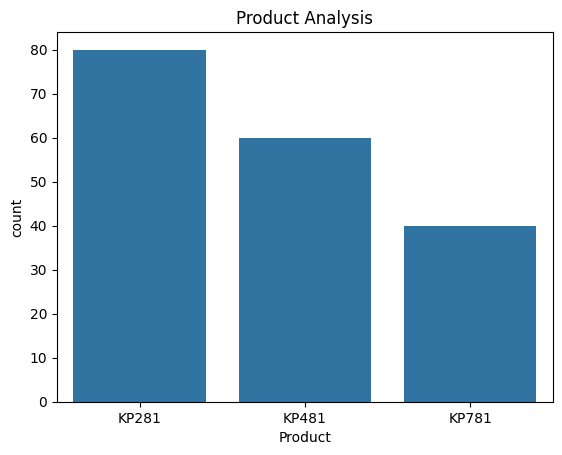

In [ ]:
# Product Analysis

sns.countplot(x = 'Product', data = df)
plt.title('Product Analysis')
plt.show()

** Insights**

*   KP281 is the most frequently bought product type.

*   KP481 ranks as the second most popular product type bought.

*   KP781 is the least bought product type.



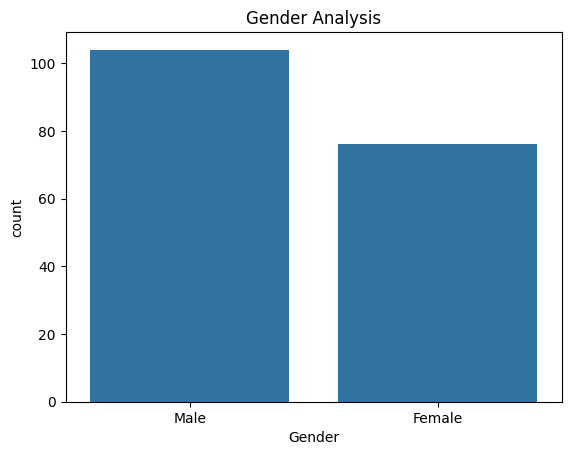

In [ ]:
sns.countplot(x = 'Gender', data = df)
plt.title('Gender Analysis')
plt.show()

**Insights**

- Males are more interested in the product compared to females.

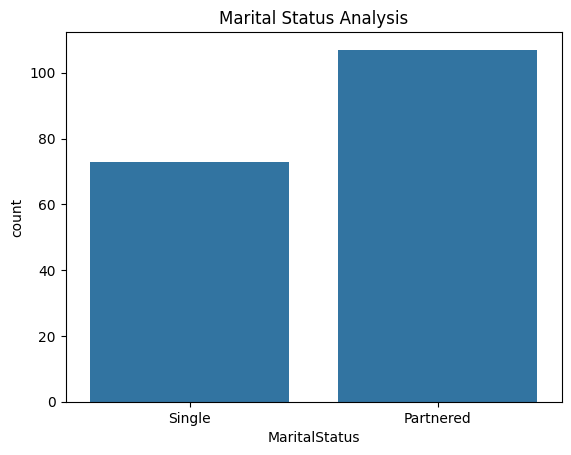

In [ ]:
sns.countplot(x = 'MaritalStatus', data = df)
plt.title('Marital Status Analysis')
plt.show()

**Insights**

- Couples show a higher interest in the product compared to singles.

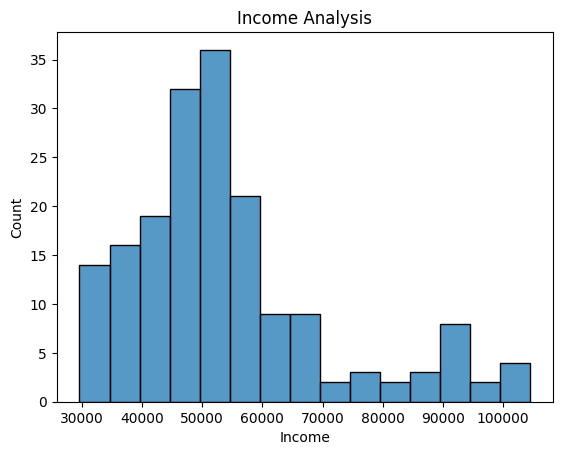

In [ ]:
sns.histplot(x = 'Income', data = df)
plt.title('Income Analysis')
plt.show()

**Insights**

- People having income in the range 40000 - 60000 are more likely to buy the product.

# Outliers

**For categorical variable(s): Boxplot**

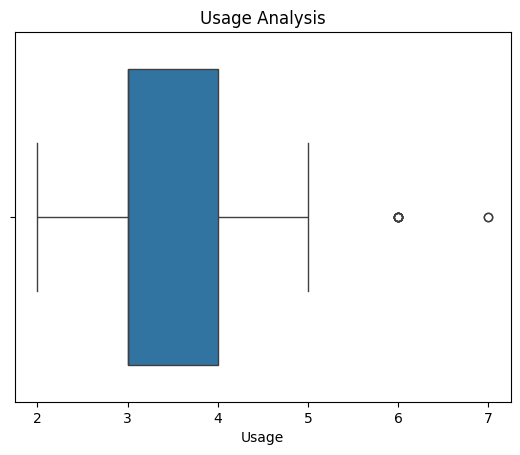

In [ ]:
sns.boxplot(x = 'Usage', data = df)
plt.title('Usage Analysis')
plt.show()

**Insights**

- 3 to 4 days is the most common usage period for customers.

- a small number of customers use the product for 6 to 7 days per week (considered outliers).



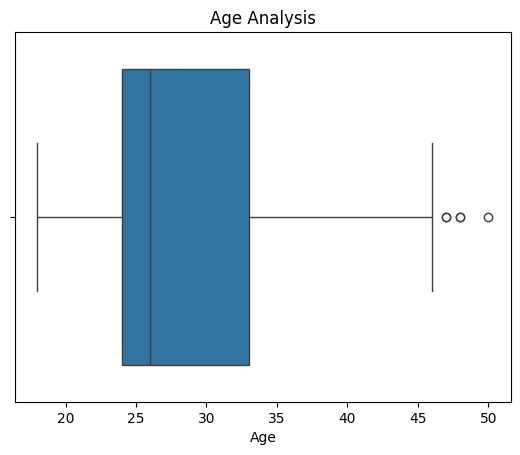

In [ ]:
sns.boxplot(x = 'Age', data = df)
plt.title('Age Analysis')
plt.show()

**Insights**

- 23 to 34 age group is the most common among customers who have purchased the product.

- customers above 45 years old are significantly fewer in comparison to the younger age group.

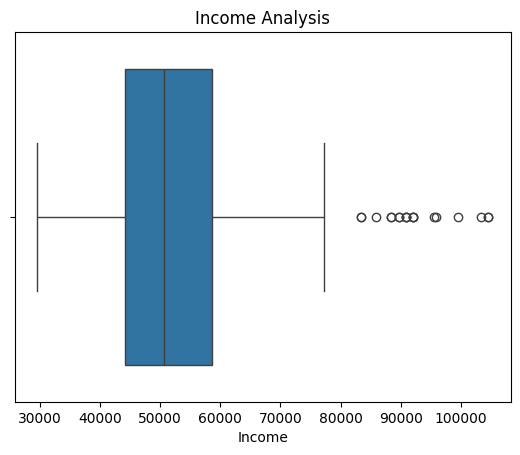

In [ ]:
sns.boxplot(x = 'Income', data = df)
plt.title('Income Analysis')
plt.show()

**Insights**

- A few customers have an annual income above 80K (considered outliers).

- Most customers earn between 45K and 60K per annum.

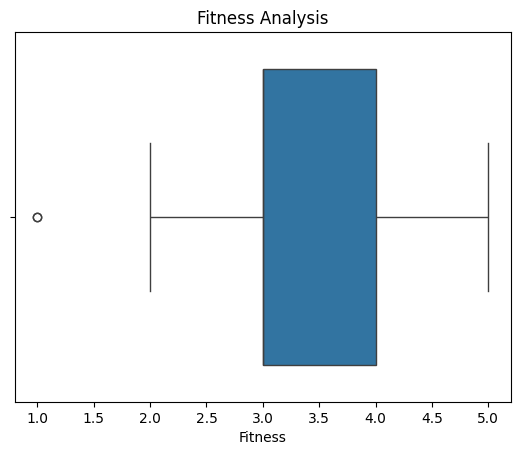

In [ ]:
sns.boxplot(x = 'Fitness', data = df)
plt.title('Fitness Analysis')
plt.show()

**Insights**

- A few customers have rated their fitness as 1.

- Most customers have rated their fitness between 3.0 and 4.0.

**For correlation: Heatmaps, Pairplots**



In [ ]:
df_copy = df.copy()

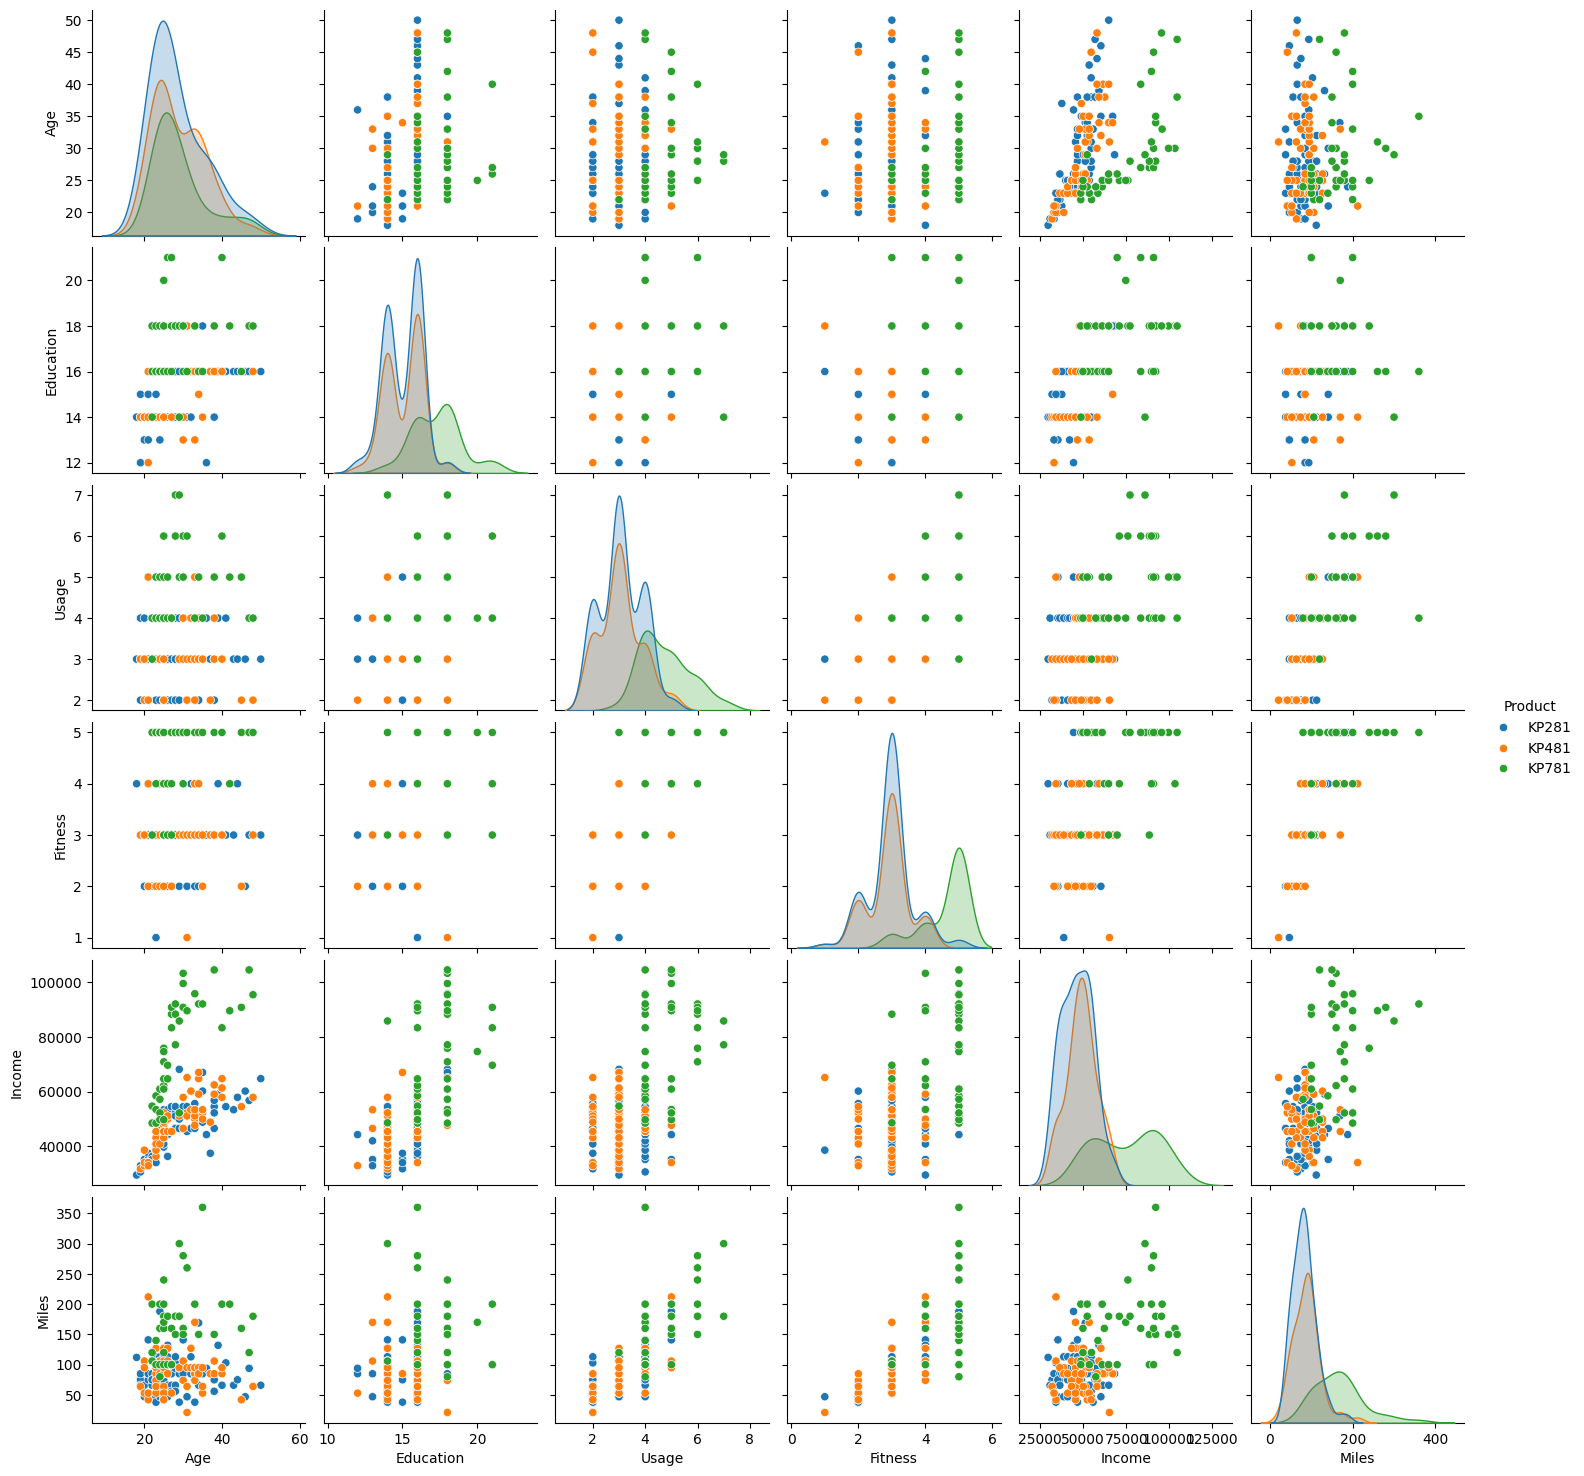

In [ ]:
sns.pairplot(df_copy, hue = 'Product')
plt.show()

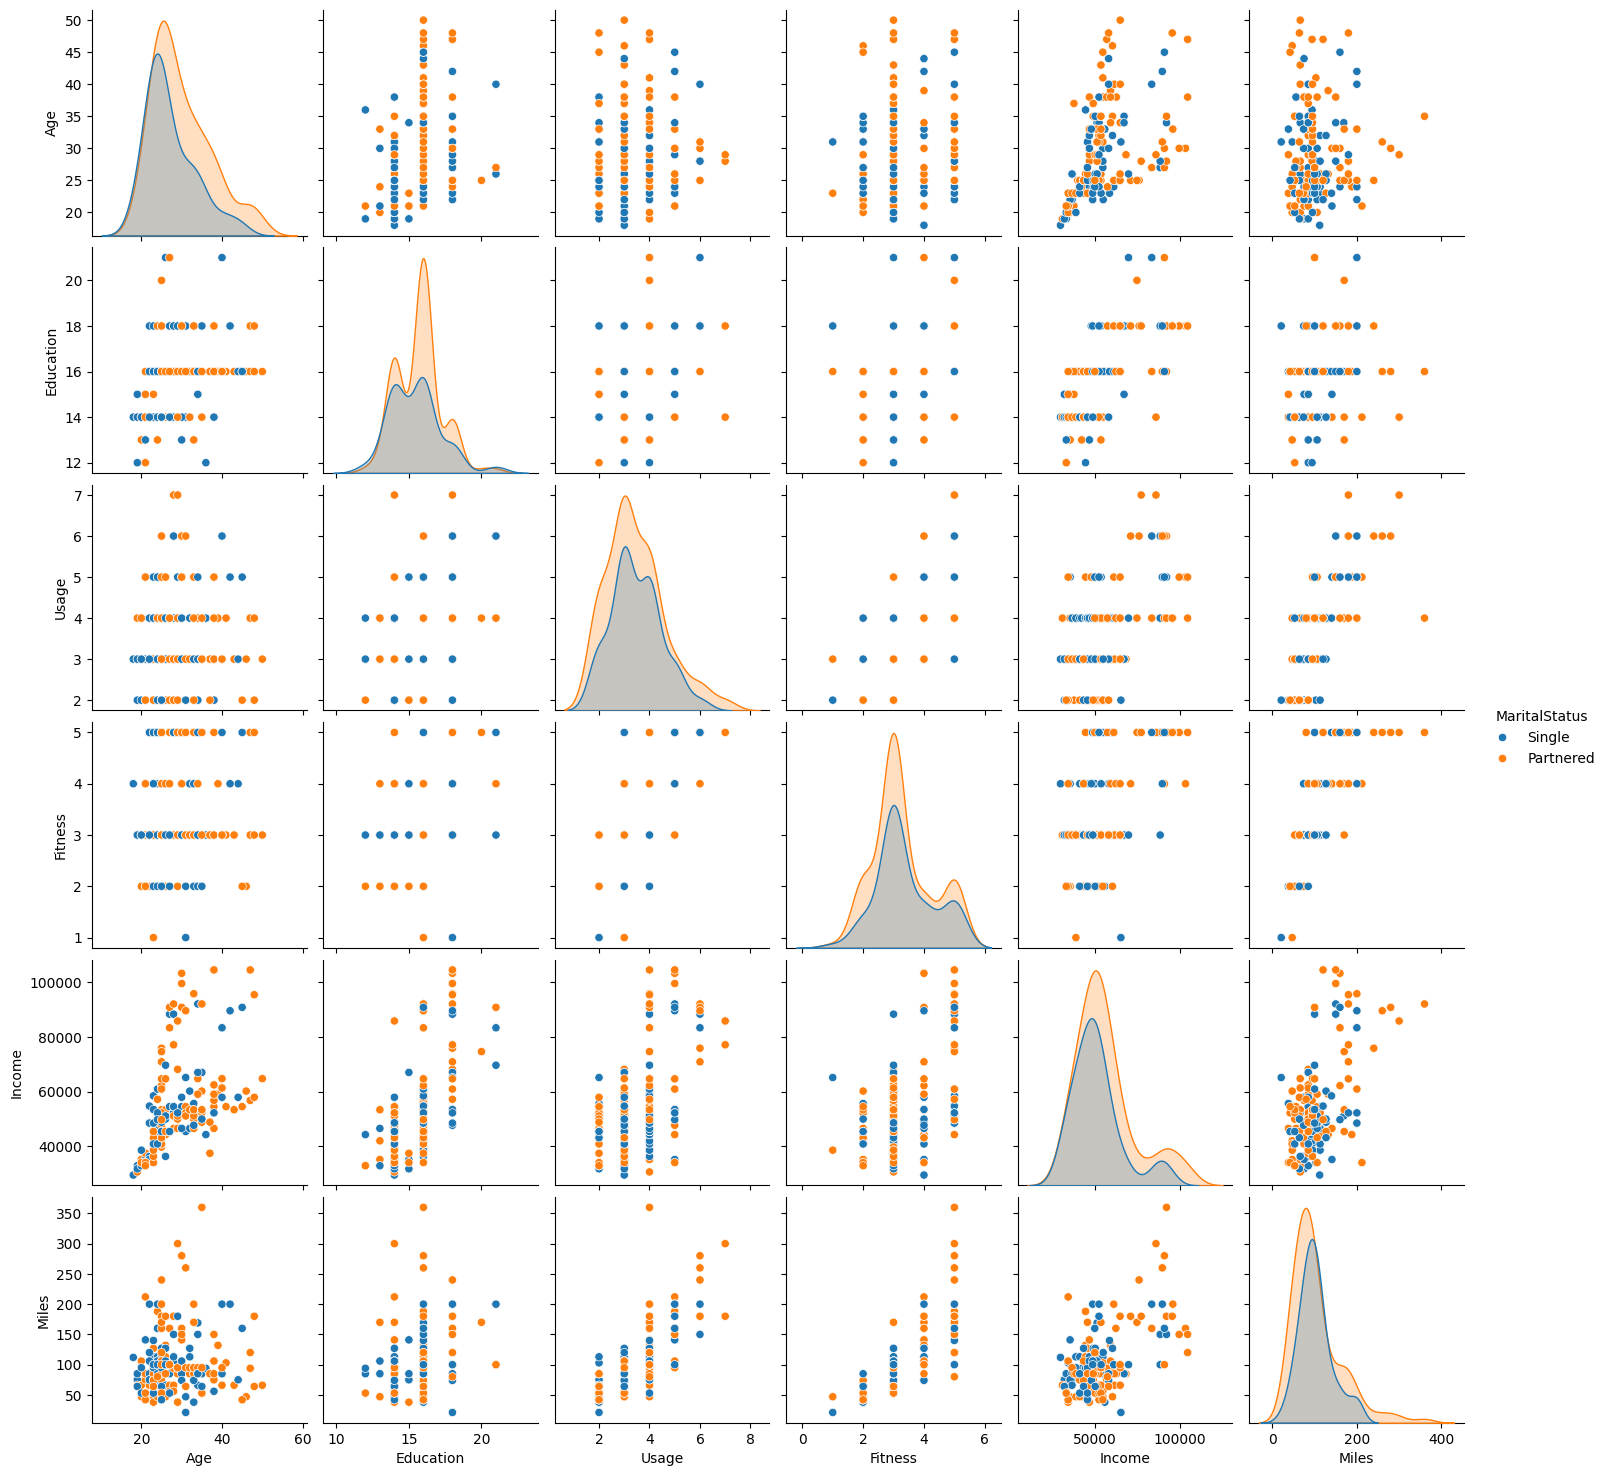

In [ ]:
sns.pairplot(df_copy, hue = 'MaritalStatus')
plt.show()

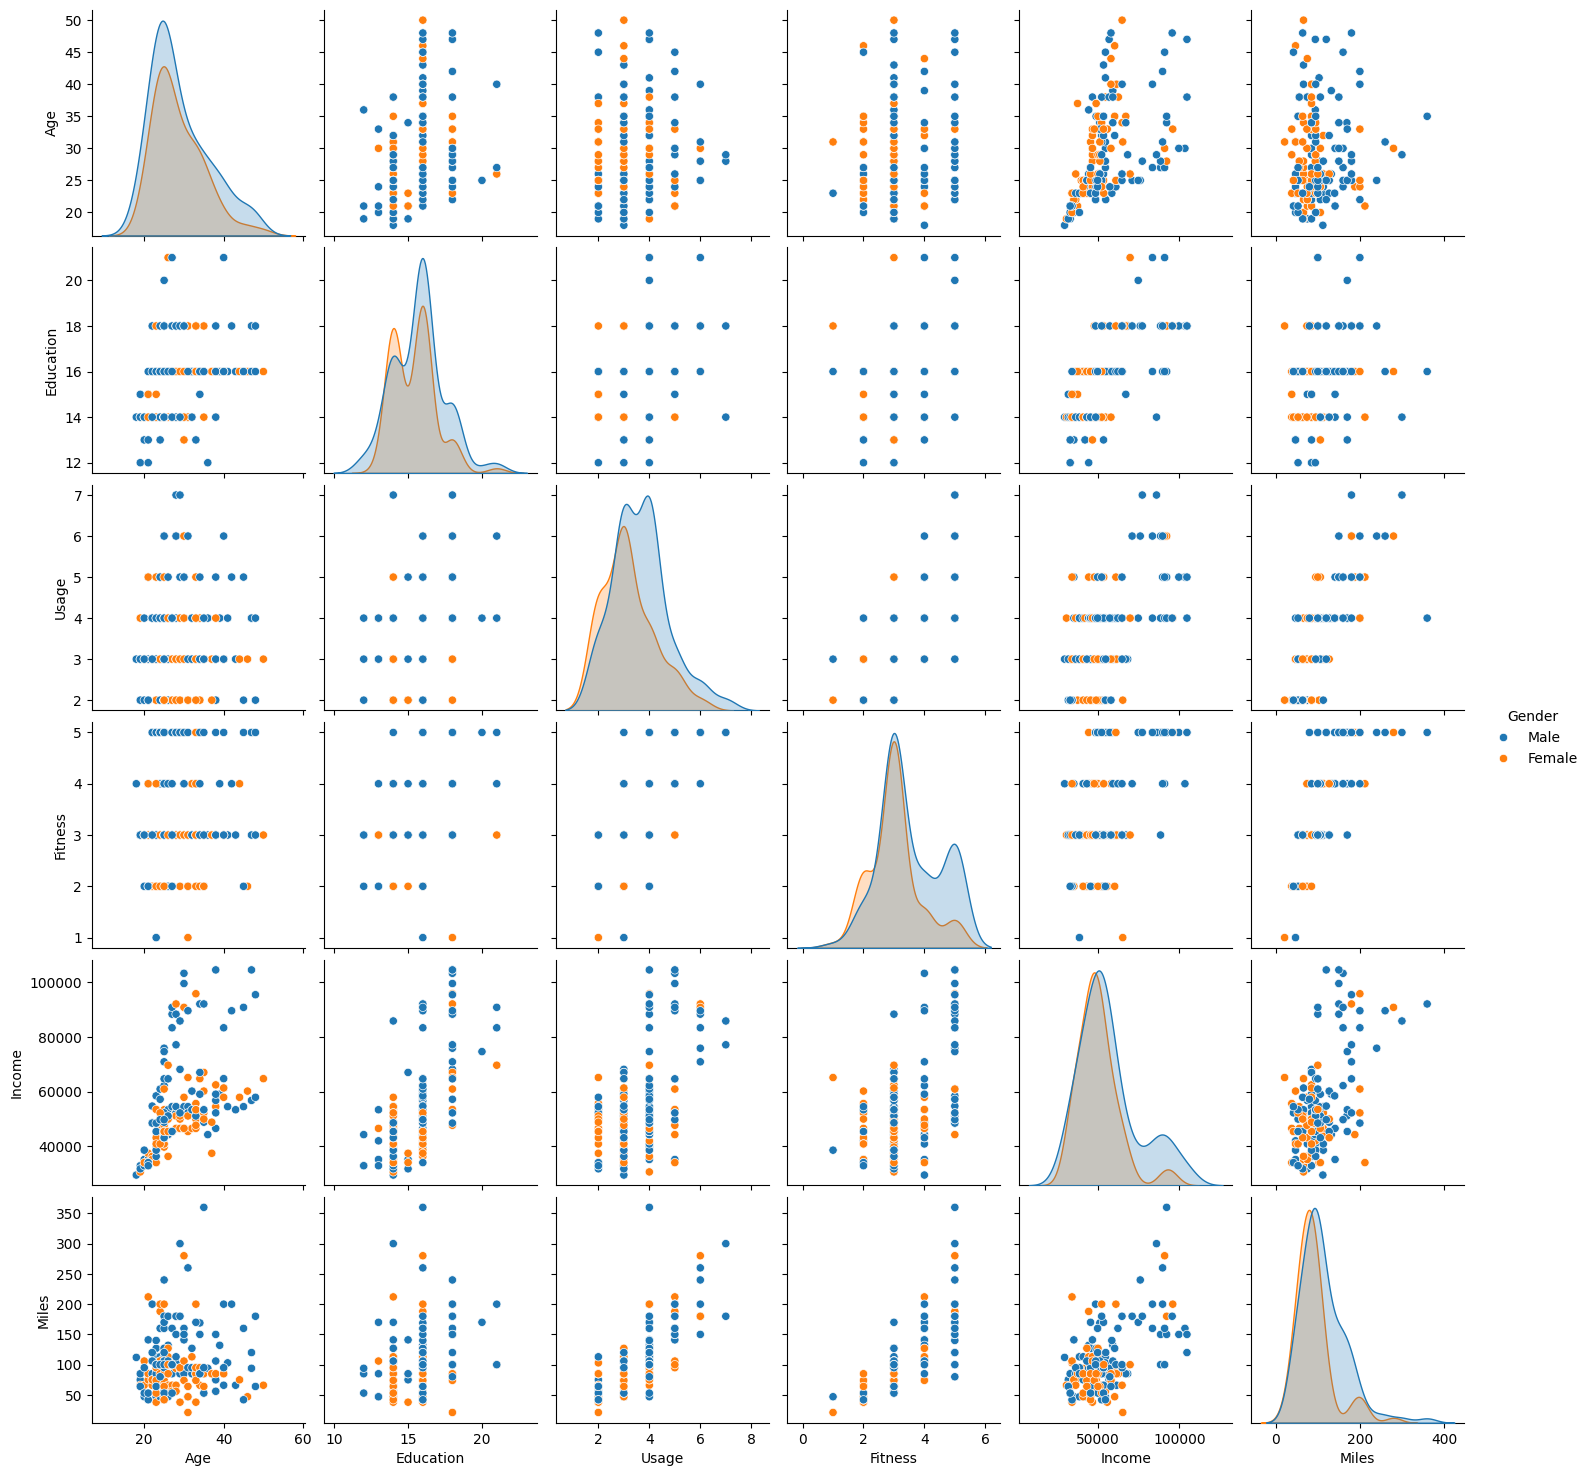

In [ ]:
sns.pairplot(df_copy, hue = 'Gender')
plt.show()

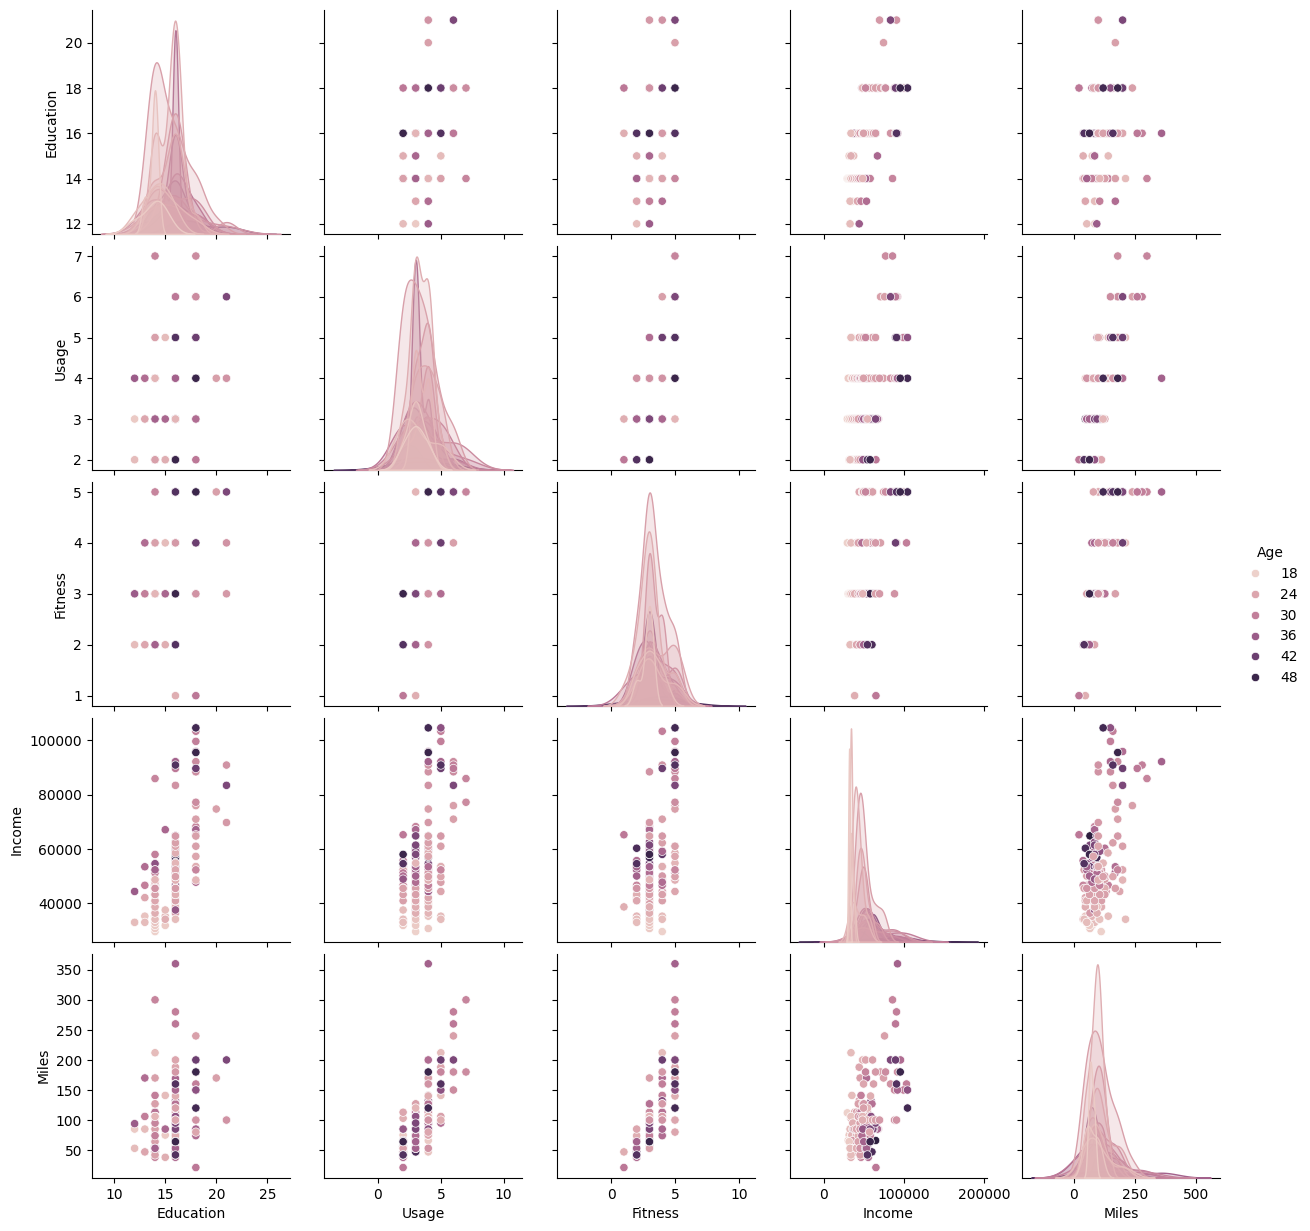

In [ ]:
sns.pairplot(df_copy, hue = 'Age')
plt.show()

In [ ]:
df_copy['Usage'] = df_copy['Usage'].astype("int")
df_copy['Fitness'] = df_copy['Fitness'].astype("int")

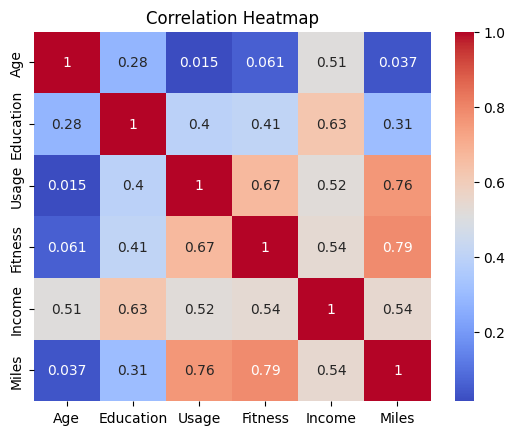

In [ ]:
df_numerical = df_copy.select_dtypes(include=['float', 'int'])
corr_matrix = df_numerical.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insights**

- The pair plot reveals a positive correlation between age and income, which is reinforced by the heatmap that indicates a strong relationship between these variables.

- As anticipated, education and income are highly correlated, and education also shows a significant correlation with fitness ratings and treadmill usage.

- Additionally, treadmill usage is strongly linked to both fitness levels and mileage, indicating that greater usage results in improved fitness and increased mileage.

**Bivariate Analysis**

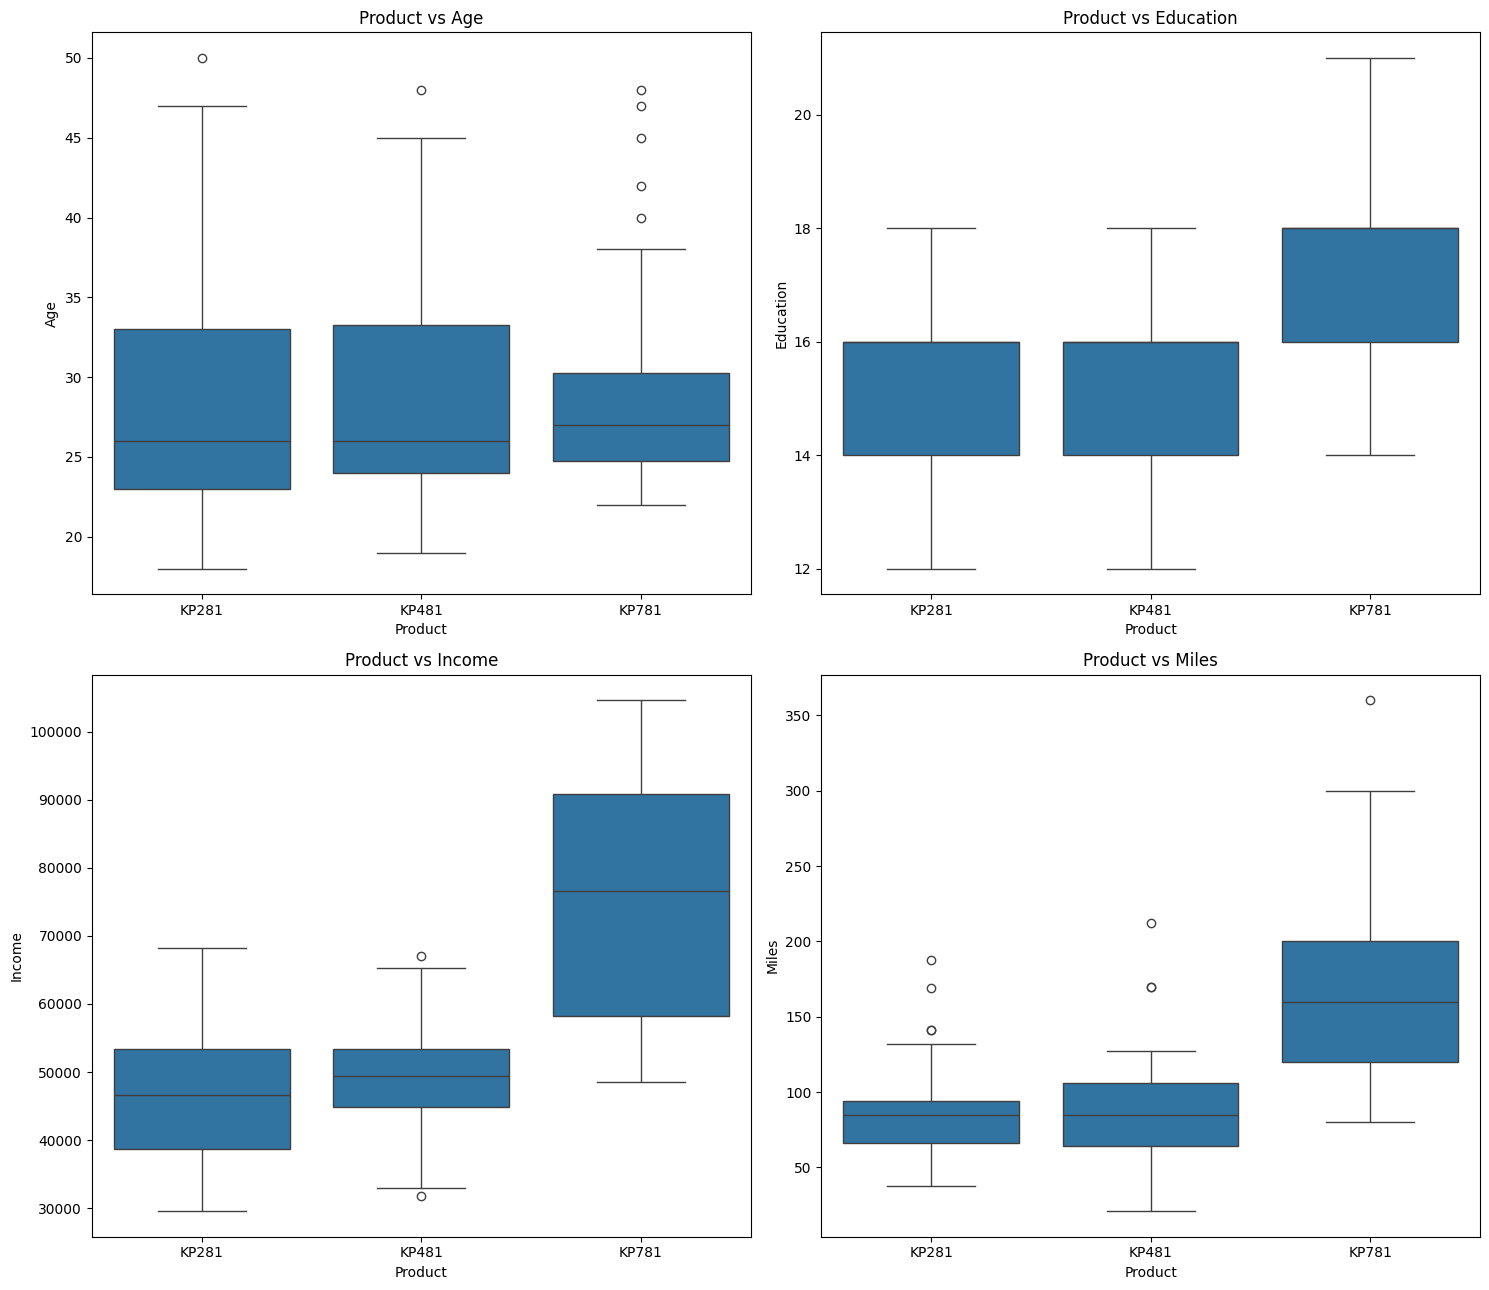

In [ ]:
fig = plt.figure(figsize=(15, 13))
gs = fig.add_gridspec(2, 2)

for i, j, k in [(0, 0, 'Age'), (0, 1, 'Education'), (1, 0, 'Income'), (1, 1, 'Miles')]:

    ax = fig.add_subplot(gs[i, j])

    sns.boxplot(x='Product', y=k, data=df, ax=ax)
    ax.set_title(f'Product vs {k}')

plt.tight_layout()
plt.show()

**Insights**

- Customers with higher education and higher income levels, as well as those intending to run more than 150 miles per week, show a strong preference for the treadmill model KP781.

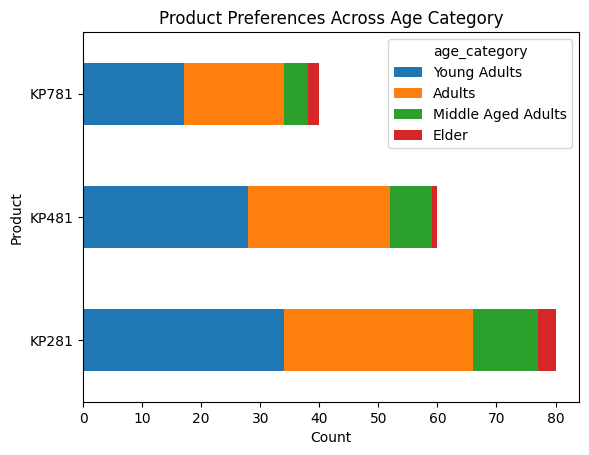

In [ ]:
data_age_grp = df.groupby(['Product', 'age_category']).size().unstack().fillna(0)

# Plotting the data
ax = data_age_grp.plot(kind='barh', stacked=True)

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Product')
ax.set_title('Product Preferences Across Age Category')

# Show the plot
plt.show()

- The analysis indicates that there is no strong correlation between age groups and product preference as there is nearly uniform distribution of age groups across all products.

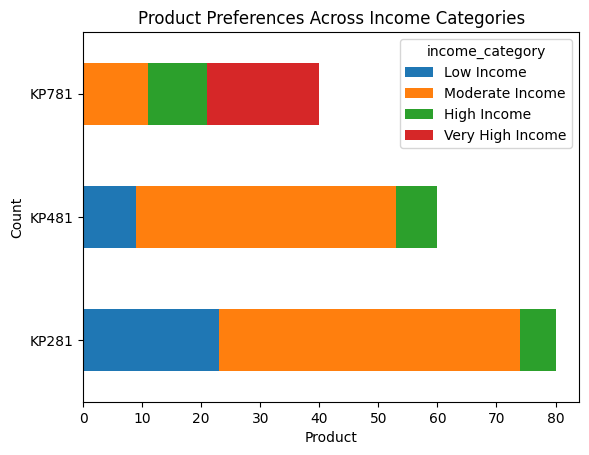

In [ ]:
data_income_grp = df.groupby(['Product', 'income_category']).size().unstack().fillna(0)

# Plotting the data
ax = data_income_grp.plot(kind='barh', stacked=True)

# Add labels and title
ax.set_xlabel('Product')
ax.set_ylabel('Count')
ax.set_title('Product Preferences Across Income Categories')

# Show the plot
plt.show()

**Insights**

- The treadmill model KP781 is preferred by customers with very high income.

- Customers with moderate income tend to prefer both treadmill models KP481 and KP281.

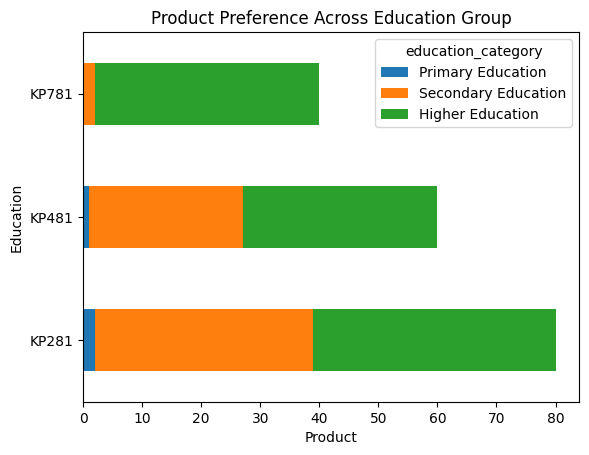

In [ ]:
data_income_grp = df.groupby(['Product', 'education_category']).size().unstack().fillna(0)

ax = data_income_grp.plot(kind='barh', stacked=True)

ax.set_xlabel('Product')
ax.set_ylabel('Education')
ax.set_title('Product Preference Across Education Group')
plt.show()

**Insights**

- The chart demonstrates that highly educated individuals have a preference for the treadmill model KP781.

- For the treadmill models KP481 and KP281, the distribution of customers with secondary education and higher education is nearly equal.

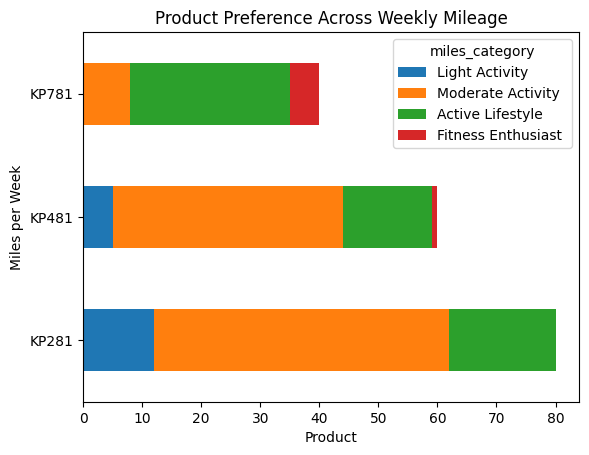

In [ ]:
data_income_grp = df.groupby(['Product', 'miles_category']).size().unstack().fillna(0)

ax = data_income_grp.plot(kind='barh', stacked=True)

ax.set_xlabel('Product')
ax.set_ylabel('Miles per Week')
ax.set_title('Product Preference Across Weekly Mileage')
plt.show()

**insights**

- Customers planning to run 100 to 200 miles per week prefer the treadmill model KP781.

- Both treadmill models KP481 and KP281 are favored by customers planning to run 50 to 100 miles per week.

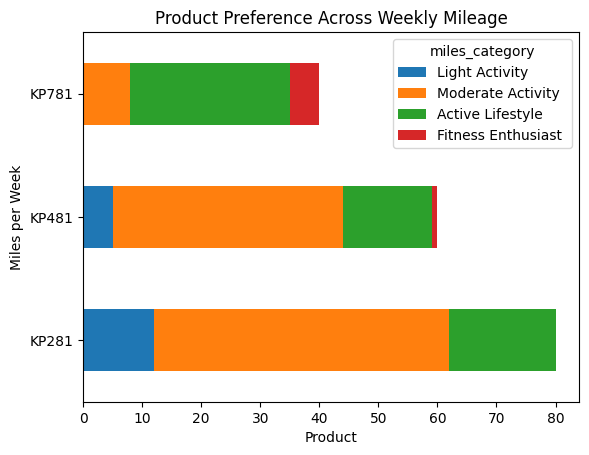

In [ ]:
data_income_grp = df.groupby(['Product', 'miles_category']).size().unstack().fillna(0)

ax = data_income_grp.plot(kind='barh', stacked=True)

ax.set_xlabel('Product')
ax.set_ylabel('Miles per Week')
ax.set_title('Product Preference Across Weekly Mileage')
plt.show()

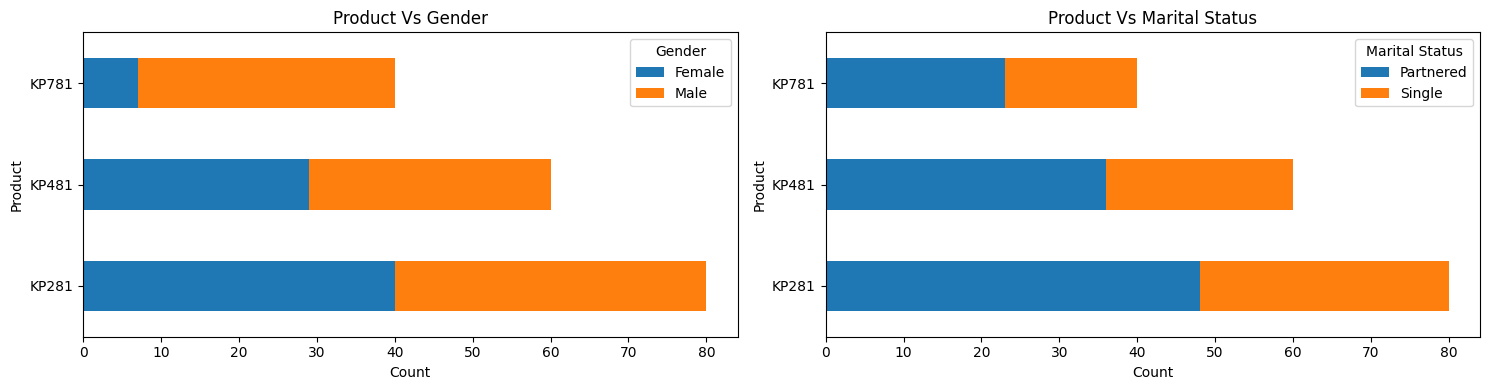

In [ ]:
data_grp = df.groupby(['Product', 'Gender']).size().unstack(fill_value=0)
data_marital_grp = df.groupby(['Product', 'MaritalStatus']).size().unstack(fill_value=0)

# Creating the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Plotting Gender data
data_grp.plot(kind='barh', stacked=True, ax=axs[0])
axs[0].set_title('Product Vs Gender')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Product')
axs[0].legend(title='Gender')

# Plotting Marital Status data
data_marital_grp.plot(kind='barh', stacked=True, ax=axs[1])
axs[1].set_title('Product Vs Marital Status')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Product')
axs[1].legend(title='Marital Status')

# Display the plot
plt.tight_layout()
plt.show()

**Insights**

- Gender

    - The treadmill model KP781 is preferred more by male customers.

    - Both treadmill models KP481 and KP281 show an equal distribution of genders.

- Marital Status

    - There is a uniform distribution of married and single customers across all three treadmill models.

    - Married customers exhibit a slightly higher preference overall.

# Probablity

## Marginal

In [ ]:
df.Product.value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Probability of buying
- KP281 is 0.44
- KP481 is 0.33
- KP781 is 0.22

In [ ]:
df.Gender.value_counts(normalize=True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

- Probability of Male customer is 0.57
- Probability of Female customer is 0.42   

In [ ]:
df.MaritalStatus.value_counts(normalize=True)

MaritalStatus
Partnered    0.594444
Single       0.405556
Name: proportion, dtype: float64

- Probability of Married/Partnered is 0.59
- Probability of Single is 0.40

In [ ]:
pd.crosstab([df.Product],df.Gender,margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00



**Marginal Probability**

- Probability of Male Customer Purchasing any product is : 57.77 %

- Probability of Female Customer Purchasing any product is : 42.22 %

**Marginal Probability of any customer buying**

- product KP281 is : 44.44 % (cheapest / entry level product)

- product KP481 is : 33.33 % (intermediate user level product)

- product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

## Conditional

In [ ]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)


MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


1. The Probability of a treadmill being purchased by a Married Customer is 59%.

- The conditional probability of purchasing the treadmill model given that the customer is Married is

    - For Treadmill model KP281 - 27%

    - For Treadmill model KP481 - 20%

    - For Treadmill model KP781 - 13%

2. The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

- The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -

  - For Treadmill model KP281 - 18%

  - For Treadmill model KP481 - 13%

  - For Treadmill model KP781 - 9%

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)


Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


In [ ]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)


Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


**Probablity of male customer buying KP781 treadmill**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


1. The Probability of a treadmill being purchased by a female is 42%.

  - The conditional probability of purchasing the treadmill model given that the customer is female is

       - For Treadmill model KP281 - 22%

       - For Treadmill model KP481 - 16%
       
       - For Treadmill model KP781 - 4%

2. The Probability of a treadmill being purchased by a male is 58%.

  - The conditional probability of purchasing the treadmill model given that the customer is male is -

      - For Treadmill model KP281 - 22%

      - For Treadmill model KP481 - 17%

      - For Treadmill model KP781 - 18%

# Customer Profiling

Based on the analysis above, we have determined the following probabilities of purchase:

  - The probability of purchasing the KP281 treadmill is 44%.

  - The probability of purchasing the KP481 treadmill is 33%.

  - The probability of purchasing the KP781 treadmill is 22%.

  - **Customer Profile for KP281 Treadmill:**

    1. Customers are primarily aged between 18 and 35 years, with a few falling between 35 and 50 years.

    2. The education level of customers is generally 13 years and above.

    3. The annual income of customers is below USD 60,000.

    4. Weekly usage is typically 2 to 4 times.

    5. Fitness levels are rated between 2 and 4.

    6. Weekly running mileage ranges from 50 to 100 miles.

  - **Customer Profile for KP481 Treadmill:**
  
    1. Customers are mainly aged between 18 and 35 years, with a few between 35 and 50 years.

    2. The education level of customers is generally 13 years and above.

    3. The annual income of customers ranges from USD 40,000 to USD 80,000.

    4. Weekly usage is typically 2 to 4 times.

    5. Fitness levels are rated between 2 and 4.

    6. Weekly running mileage ranges from 50 to 200 miles.

  - **Customer Profile for KP781 Treadmill:**

    1. The target demographic is predominantly male.

    2. Customers are aged between 18 and 35 years.

    3. The education level of customers is generally 15 years and above.

    4. The annual income of customers is USD 80,000 and above.

    5. Weekly usage is typically 4 to 7 times.

    6. Fitness levels are rated between 3 and 5.

    7. Weekly running mileage is 100 miles and above.


# Recommendations

- The number of females interested in exercise equipment is quite low in this market. Therefore, we should launch a marketing campaign aimed at encouraging women to engage in regular exercise.

- The KP281 and KP481 treadmills are preferred by customers with an annual income ranging from 39,000 to 53,000. These models should be marketed as budget-friendly options.

- Given that the KP781 offers more advanced features and functionalities, it should be positioned as a product for professionals and athletes.

- Promotion for the KP781 should involve influencers and international athletes to enhance its appeal.

- Research is needed to explore market expansion for customers aged over 50, taking into account the health benefits and potential risks.

- We should provide excellent customer support and recommend users upgrade from lower-tier models to higher versions after consistent usage.

- The KP781 can also be recommended to female customers who are serious about their workouts, along with guidance on its advanced features for easy usage.

- Finally, we should target individuals aged 40 and above when recommending the KP781 treadmill.